# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# READ DATA

In [2]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# DESKRIPSI DATA

In [3]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# INFO DATA

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# CEK DATA DUPLICATE

In [5]:
df.duplicated().sum()

0

# CEK NILAI NULL

In [6]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# menghapus kolom yang tidak di perlukan

In [7]:


del df['country']

In [14]:
df.head()

,child_mort,ekspor,health,impor,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# ALGORITMA
## KMeans Clustering

In [9]:
df= df.rename(columns={"imports":"impor","exports":"ekspor"})
df.head(3)

,child_mort,ekspor,health,impor,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [10]:
#point adalah atribut yang kita pake untuk clustering
points = df[['ekspor','impor']]
#tampilkanvaluenya dalam brntuk array
points = points.values

In [11]:
#untuk mmbredakan centroid nya berapa si
model = KMeans(n_clusters=5)
model.fit(points)

KMeans(n_clusters=5)

In [12]:
#untuk cek prediksintya misal kita tampung di nilai d
y= model.fit_predict(points)
print (y)

[0 0 3 2 2 3 0 3 2 2 0 2 3 2 2 1 2 3 0 2 0 2 3 2 2 3 3 2 3 3 0 3 2 3 3 3 0
 2 1 3 2 2 2 1 2 3 3 3 0 1 3 1 1 2 3 2 0 0 2 0 3 0 3 0 3 1 0 1 2 3 3 3 2 1
 3 3 0 3 1 2 3 0 2 1 0 2 0 1 0 2 1 4 0 0 3 1 1 3 4 2 2 0 0 2 0 0 0 3 2 3 1
 3 0 3 3 2 3 1 2 3 3 2 3 2 3 3 3 0 2 3 0 1 3 4 1 1 1 3 2 3 3 0 3 2 2 2 0 3
 1 3 0 0 2 3 2 3 2 1 3 3 3 3 2 3 1 3 3]


## VISUALISASI DATA

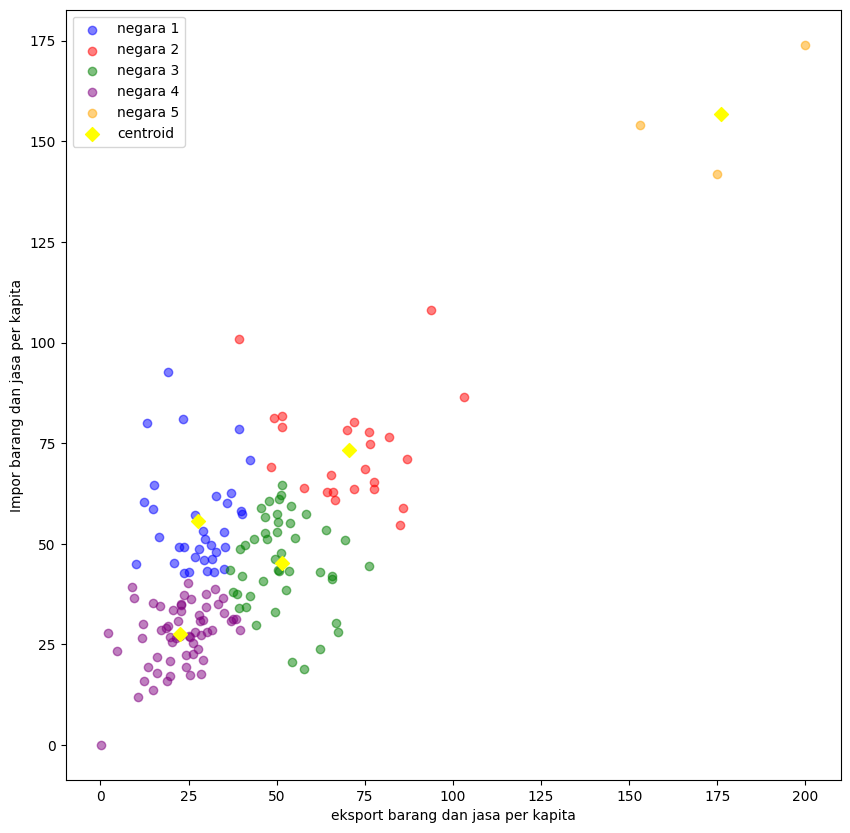

In [15]:


centroids = model.cluster_centers_

centroid_x = centroids[:,0]
centroid_y = centroids[:,1]

plt.figure(figsize=(10,10))
plt.scatter(points[y==0,0], points[y==0,1], c='blue', label='negara 1', alpha=0.5 )
plt.scatter(points[y==1,0], points[y==1,1], c='red', label='negara 2',alpha=0.5 )
plt.scatter(points[y==2,0], points[y==2,1], c='green', label='negara 3',alpha=0.5 )
plt.scatter(points[y==3,0], points[y==3,1], c='purple', label='negara 4',alpha=0.5 )
plt.scatter(points[y==4,0], points[y==4,1], c='orange', label='negara 5',alpha=0.5 )
#plt.scatter(xs,ys)
plt.scatter(centroid_x,centroid_y,marker="D", s=50, label="centroid", c='yellow')
plt.xlabel('eksport barang dan jasa per kapita')
plt.ylabel('Impor barang dan jasa per kapita')
plt.legend()
plt.show()

In [16]:
#menentukan parameter terbaik
cluster = range(1,7)
inertias =[]

for n in cluster:
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

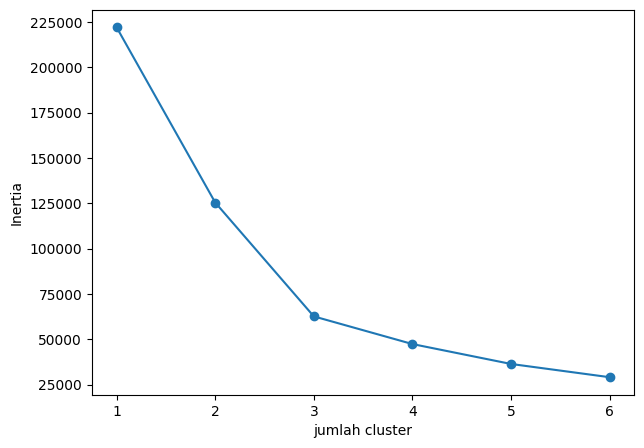

In [19]:
plt.figure(figsize =(7,5))
plt.plot(cluster, inertias, '-o')
plt.xlabel("jumlah cluster")
plt.ylabel("Inertia")
plt.xticks(cluster)
plt.show()